## Importing all Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import QuantileTransformer, StandardScaler, FunctionTransformer, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report, accuracy_score

## Reading Dataset

In [2]:
df = pd.read_csv("tested.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
df.shape

(418, 12)

## Imputing missing values

In [6]:
missing_val = df.isna().sum()
percentages = (missing_val / len(df)) * 100
result = pd.DataFrame({
    'No. of missing values' : missing_val.values,
    'percentage' : percentages.round(2)
}, index=df.columns)
result

,No. of missing values,percentage
PassengerId,0,0.00
Survived,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
Age,86,20.57
SibSp,0,0.00
Parch,0,0.00
Ticket,0,0.00
Fare,1,0.24


In [7]:
df.drop(['Cabin'], axis=1, inplace=True)

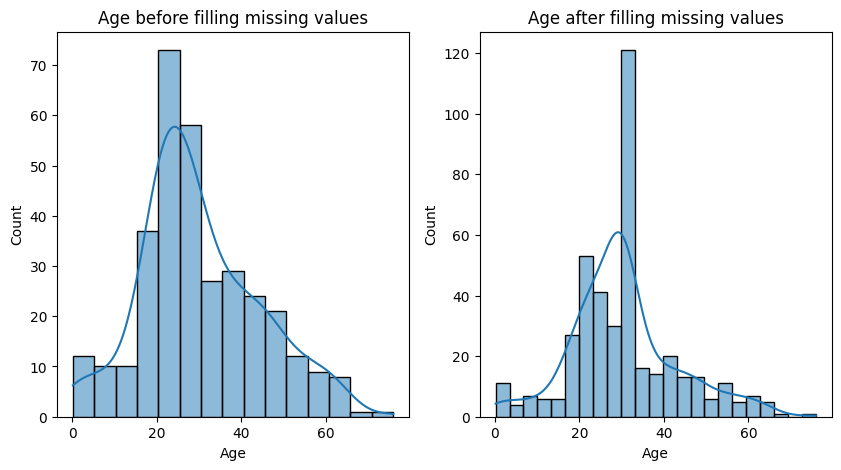

In [8]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.histplot(df['Age'], ax=ax[0], kde=True)
sns.histplot(df['Age'].fillna(df['Age'].mean()), ax=ax[1], kde=True)
ax[0].set_title('Age before filling missing values')
ax[1].set_title('Age after filling missing values')
plt.show()

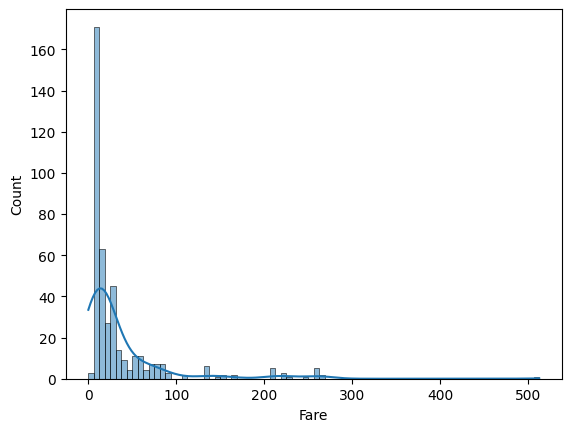

In [9]:
sns.histplot(data=df, x='Fare', kde=True)
plt.show()

In [10]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)

In [11]:
missing_val = df.isna().sum()
percentages = (missing_val / len(df))*100
result = pd.DataFrame({
    'No. of missing values' : missing_val.values,
    'percentage' : percentages.round(2)
}, index=df.columns)
result

,No. of missing values,percentage
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
Age,0,0.0
SibSp,0,0.0
Parch,0,0.0
Ticket,0,0.0
Fare,0,0.0


## Feature Selection

In [12]:
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [13]:
corr_df = df.corr(numeric_only=True)
corr_df['Survived'].sort_values(ascending=False)

Survived    1.000000
Fare        0.192036
Parch       0.159120
SibSp       0.099943
Age        -0.000011
Pclass     -0.108615
Name: Survived, dtype: float64

In [14]:
df['family_size'] = df['SibSp'] + df['Parch']

In [15]:
corr_df = df.corr(numeric_only=True)
corr_df['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.192036
family_size    0.161803
Parch          0.159120
SibSp          0.099943
Age           -0.000011
Pclass        -0.108615
Name: Survived, dtype: float64

In [16]:
df.drop(['SibSp', 'Parch'], axis=1, inplace=True)

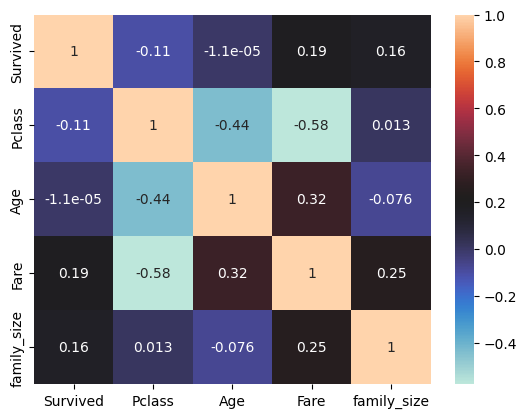

In [17]:
corr_df = df.corr(numeric_only=True)
sns.heatmap(corr_df, cmap='icefire', annot=True)
plt.show()

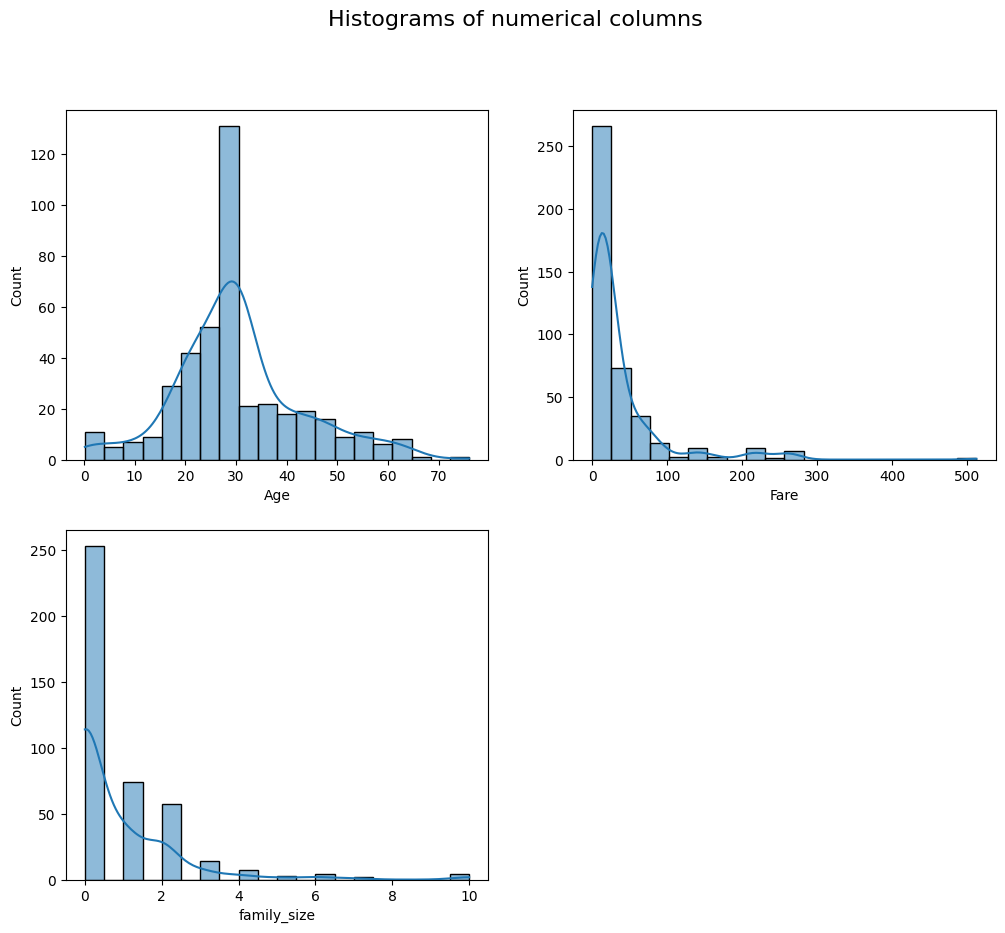

In [18]:
num_col = list(df.drop(['Pclass', 'Survived'], axis=1).select_dtypes(include=['float', 'int']).columns)
num = int(len(num_col)/2) if int(len(num_col)/2)>1 else 2
fig, ax = plt.subplots(num, num, figsize=(12,10))
for j in range(num):
    for i in range(num):
        try:
            sns.histplot(data=df, x=num_col[0], kde=True, bins=20, ax=ax[j][i])
            num_col.pop(0)
        except:
            fig.delaxes(ax=ax[j][i])
fig.suptitle('Histograms of numerical columns', fontsize=16)
plt.show()

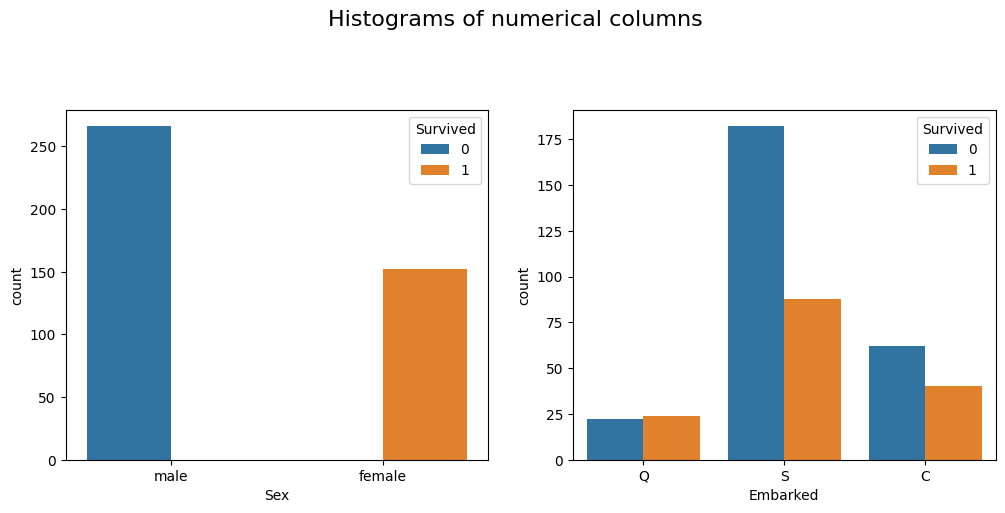

In [19]:
cat_col=list(df.select_dtypes(include=['object']).columns)
num=int(len(cat_col)/2) if int(len(cat_col)/2)>1 else 2
fig ,ax = plt.subplots(num,num,figsize=(12,10))
for j in range(num):
    for i in range(num
):
        try:
            sns.countplot(data=df,x=cat_col[0],ax=ax[j][i],hue='Survived')
            cat_col.pop(0)
        except:
            fig.delaxes(ax=ax[j][i])
fig.suptitle('Histograms of numerical columns', fontsize=16)
plt.show()

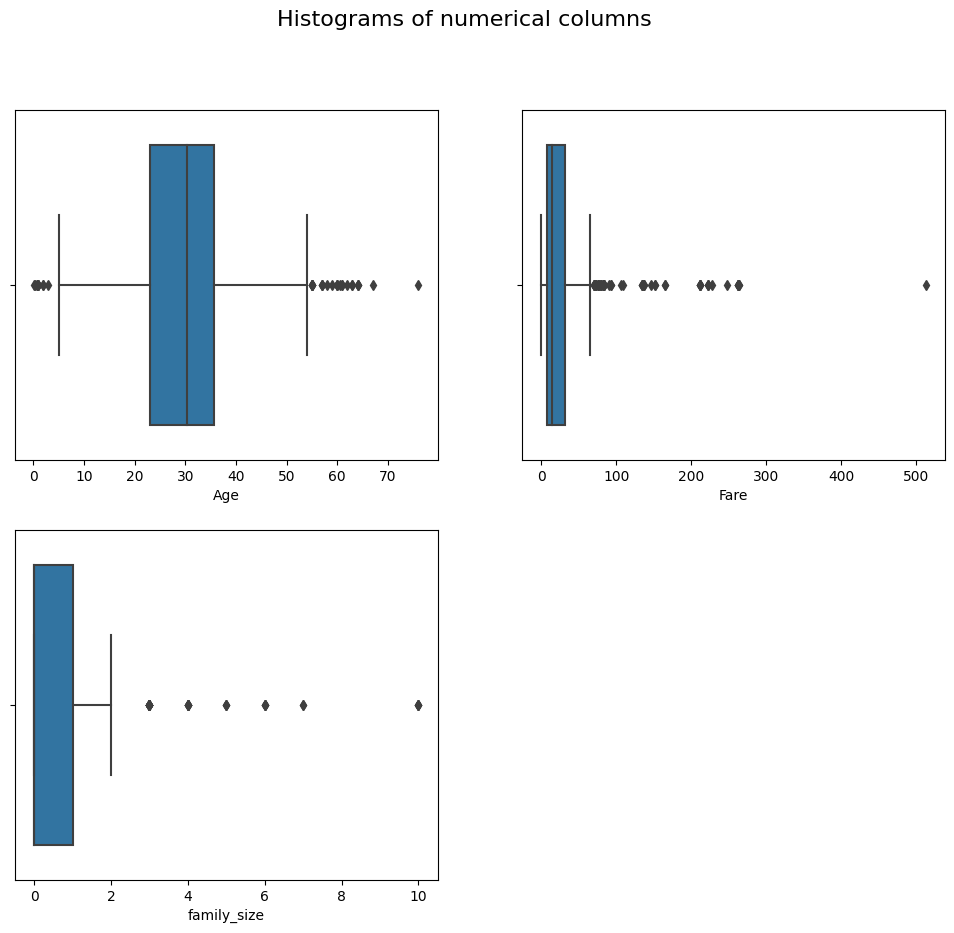

In [20]:
num_col=list(df.drop(['Pclass','Survived'],axis=1).select_dtypes(include=['float','int']).columns)
num=int(len(num_col)/2) if int(len(num_col)/2)>1 else 2
fig ,ax = plt.subplots(num,num,figsize=(12,10))
for j in range(num):
    for i in range(num
):
        try:
            sns.boxplot(data=df,x=num_col[0],ax=ax[j][i])
            num_col.pop(0)
        except:
            fig.delaxes(ax=ax[j][i])
fig.suptitle('Histograms of numerical columns', fontsize=16)
plt.show()

In [21]:
ft = FunctionTransformer(np.log1p)
qt = QuantileTransformer(output_distribution='normal')
x_f = pd.DataFrame(qt.fit_transform(df[['Fare','Age','family_size']]),columns=['Fare','Age','family_size'])
x_f

C:\Users\Radhika Gupta\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (418). n_quantiles is set to n_samples.
  warnings.warn(


,Fare,Age,family_size
0,-0.819555,0.631708,-5.199338
1,-2.097253,1.224872,0.507918
2,-0.333696,2.125161,-5.199338
3,-0.414296,-0.292657,-5.199338
4,-0.227360,-0.758016,1.047294
...,...,...,...
413,-0.511340,0.208892,-5.199338
414,1.479193,0.832236,-5.199338
415,-1.444206,0.802848,-5.199338
416,-0.511340,0.208892,-5.199338


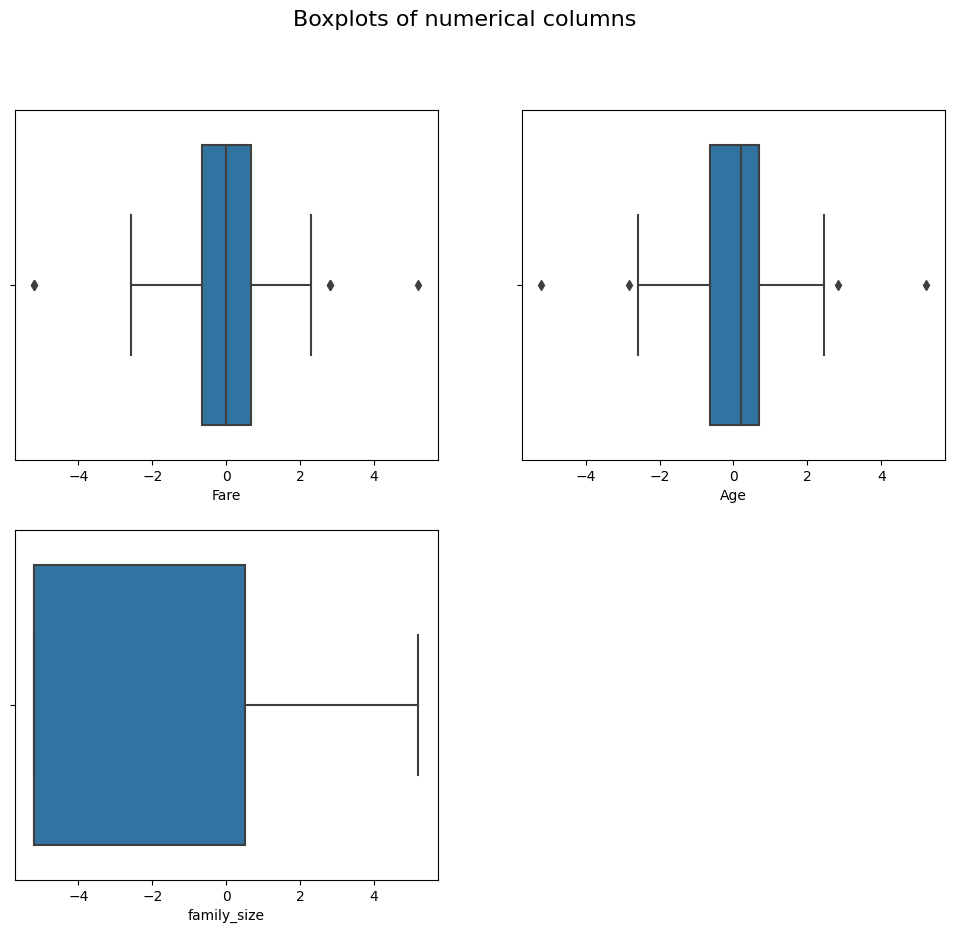

In [22]:
num_col=list(x_f.select_dtypes(include=['float','int']).columns)
num=int(len(num_col)/2) if int(len(num_col)/2)>1 else 2
fig ,ax = plt.subplots(num,num,figsize=(12,10))
for j in range(num):
    for i in range(num):
        try:
            sns.boxplot(data=x_f,x=num_col[0],ax=ax[j][i])
            num_col.pop(0)
        except:
            fig.delaxes(ax=ax[j][i])
fig.suptitle('Boxplots of numerical columns', fontsize=16)
plt.show()

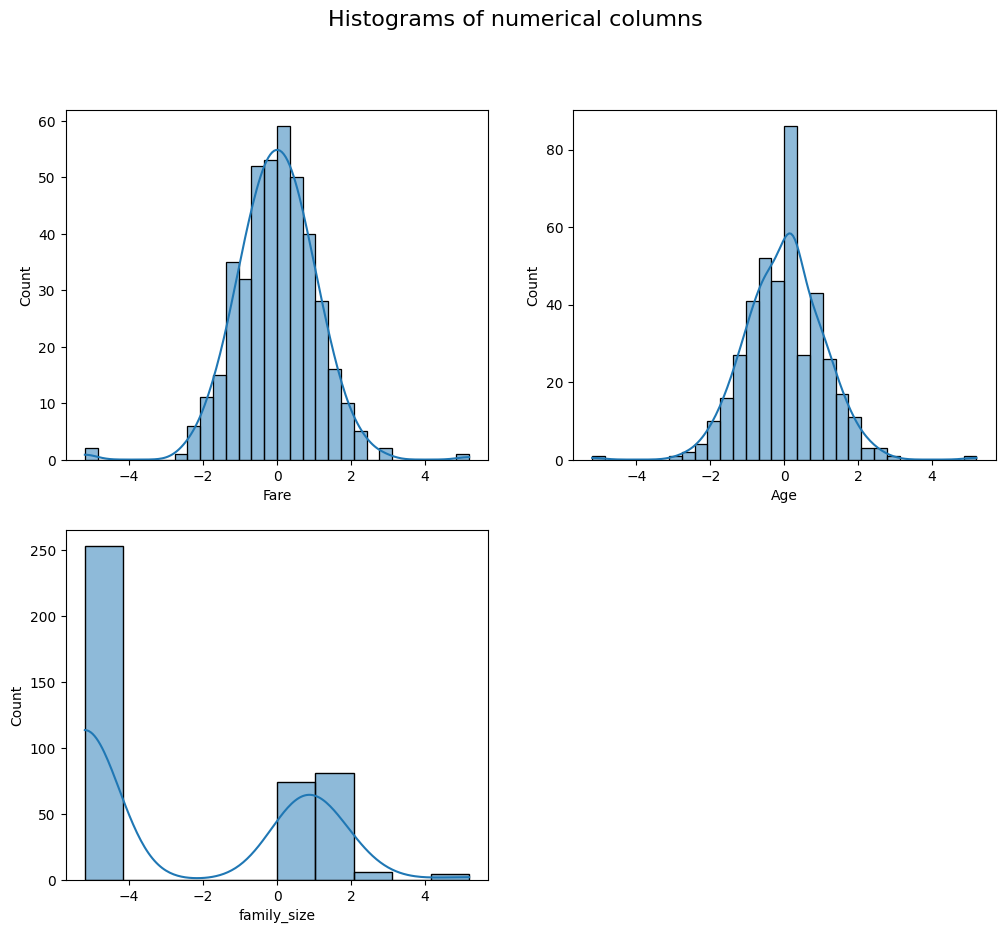

In [23]:
num_col=list(x_f.select_dtypes(include=['float','int']).columns)
num=int(len(num_col)/2) if int(len(num_col)/2)>1 else 2
fig ,ax = plt.subplots(num,num,figsize=(12,10))
for j in range(num):
    for i in range(num):
        try:
            sns.histplot(data=x_f,x=num_col[0],kde=True,ax=ax[j][i])
            num_col.pop(0)
        except:
            fig.delaxes(ax=ax[j][i])
fig.suptitle('Histograms of numerical columns', fontsize=16)
plt.show()

## Model selection and Evaluation

In [24]:
df = pd.get_dummies(df, drop_first=True, dtype='int')

In [25]:
df.head()

,Survived,Pclass,Age,Fare,family_size,Sex_male,Embarked_Q,Embarked_S
0,0,3,34.5,7.8292,0,1,1,0
1,1,3,47.0,7.0000,1,0,0,1
2,0,2,62.0,9.6875,0,1,1,0
3,0,3,27.0,8.6625,0,1,0,1
4,1,3,22.0,12.2875,2,0,0,1


In [26]:
qt = QuantileTransformer(output_distribution='normal')
df[['Fare', 'Age', 'family_size']] = qt.fit_transform(df[['Fare', 'Age', 'family_size']])

C:\Users\Radhika Gupta\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (418). n_quantiles is set to n_samples.
  warnings.warn(


In [27]:
X = df.drop(['Survived'], axis=1)
y = df['Survived']
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
lg = LogisticRegression(solver='liblinear')
lg.fit(train_X, train_y)


LogisticRegression(solver='liblinear')

In [29]:
y_pred = lg.predict(test_X)
accuracy_score(test_y, y_pred)

1.0